<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

![avatar](small_images.jpg)

CIFAR-10数据集是一个用于监督学习训练的数据集，由60000个样本组成，每个样本都是一张32*32像素的RGB图像，共有10个类别，分别是飞机（airplane）、汽车（automobile）、鸟（bird）、猫（cat）、鹿（deer）、狗（dog）、青蛙（frog）、马（horse）、船（ship）和卡车（truck）。
以下是CIFAR-10数据集的出处链接：
[TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/cifar10)

In [2]:
import pickle

# 因为笔记本性能差，所以我用kaggle训练，数据集在'/kaggle/input/cifar-10-batches-py-tar-gz'
data_path = '/kaggle/input/cifar-10-batches-py-tar-gz/cifar-10-batches-py/'


# 读取训练集数据
with open(data_path + 'data_batch_1', 'rb') as fo:
    data = pickle.load(fo, encoding='bytes')
    X_train, y_train = data[b'data'], np.array(data[b'labels'])

# 读取测试集数据
with open(data_path + 'test_batch', 'rb') as fo:
    test_data = pickle.load(fo, encoding='bytes')
    X_test, y_test = test_data[b'data'], np.array(test_data[b'labels'])

# 现在，X_train, y_train, X_test, y_test 包含了CIFAR-10数据集的训练集和测试集数据及其标签

X_train.shape

(10000, 3072)

In [3]:
X_test.shape

(10000, 3072)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(10000,)

In [5]:
y_train[:5]

array([6, 9, 9, 4, 1])

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1])

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

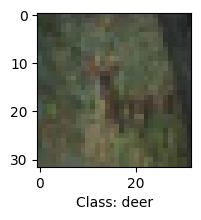

In [10]:
import matplotlib.pyplot as plt

def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    # 将图像重新形状为 (32, 32, 3)
    img = X[index].reshape(3, 32, 32).transpose(1, 2, 0)
    plt.imshow(img)
    plt.xlabel(f"Class: {classes[y[index]]}")

# 调用这个函数
plot_sample(X_train, y_train, 10)


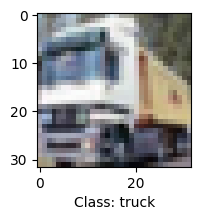

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
    layers.Reshape((32, 32, 3), input_shape=(3072,)),  # 添加这一行来重塑输入
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')    
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
313/313 [==============================] - 6s 4ms/step - loss: 1.9967 - accuracy: 0.2747
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8053 - accuracy: 0.3611
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 1.7193 - accuracy: 0.3881
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 1.6624 - accuracy: 0.4123
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.6125 - accuracy: 0.4323


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.52      0.50      1000
           1       0.42      0.64      0.50      1000
           2       0.34      0.24      0.28      1000
           3       0.31      0.30      0.31      1000
           4       0.44      0.23      0.30      1000
           5       0.34      0.33      0.33      1000
           6       0.52      0.35      0.42      1000
           7       0.32      0.65      0.43      1000
           8       0.60      0.43      0.50      1000
           9       0.48      0.41      0.44      1000

    accuracy                           0.41     10000
   macro avg       0.43      0.41      0.40     10000
weighted avg       0.43      0.41      0.40     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [15]:
cnn = models.Sequential([
    layers.Reshape((32, 32, 3), input_shape=(3072,)), 
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
313/313 [==============================] - 7s 3ms/step - loss: 2.1049 - accuracy: 0.2190
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 1.8095 - accuracy: 0.3569
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6916 - accuracy: 0.3982
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6179 - accuracy: 0.4335
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 1.5641 - accuracy: 0.4523
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 1.5222 - accuracy: 0.4684
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 1.4889 - accuracy: 0.4810
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 1.4392 - accuracy: 0.4969
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 1.4041 - accuracy: 0.5150
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 1.3772 - accuracy: 0.5212

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5293 - accuracy: 0.4658


[1.5293352603912354, 0.4657999873161316]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.27084551e-02, 6.60773292e-02, 1.56724542e-01, 3.11259001e-01,
        1.54682212e-02, 9.53478292e-02, 1.64906561e-01, 1.18633395e-03,
        1.56612515e-01, 9.70917847e-03],
       [2.76379064e-02, 2.67505608e-02, 4.28776210e-03, 2.19743582e-03,
        5.12107229e-03, 1.29140425e-03, 2.36469758e-04, 2.13309843e-03,
        8.65591466e-01, 6.47528321e-02],
       [1.45270482e-01, 1.16776496e-01, 8.81258771e-03, 9.10439808e-03,
        7.32661411e-03, 8.06588866e-03, 8.11022473e-04, 2.10143756e-02,
        5.86790502e-01, 9.60276574e-02],
       [2.35228136e-01, 6.10021129e-02, 4.80092615e-02, 7.68552767e-03,
        9.83087160e-03, 5.52364159e-03, 6.26880385e-04, 1.34458859e-02,
        5.85992932e-01, 3.26547585e-02],
       [9.54264135e-04, 1.34179287e-03, 1.69748560e-01, 2.69442145e-02,
        3.48487049e-01, 2.52782591e-02, 4.16858375e-01, 6.37915870e-03,
        3.28552630e-03, 7.22861267e-04]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6])

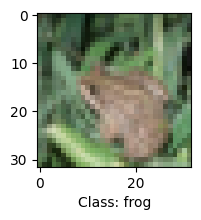

In [22]:
plot_sample(X_test, y_test,4)

In [23]:
classes[y_classes[4]]

'frog'

In [24]:
classes[y_classes[4]]

'frog'

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import time
import os
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomGrayscale(),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform1 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 数据集根目录
data_root = '/kaggle/input/cifar-10-batches-py-tar-gz/'

# 训练集
trainset = torchvision.datasets.CIFAR10(root=data_root, train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

# 测试集
testset = torchvision.datasets.CIFAR10(root=data_root, train=False, download=True, transform=transform1)
testloader = torch.utils.data.DataLoader(testset, batch_size=50, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU()

        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU()

        self.conv5 = nn.Conv2d(128, 128, 3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.conv7 = nn.Conv2d(128, 128, 1, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()

        self.conv8 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv9 = nn.Conv2d(256, 256, 3, padding=1)
        self.conv10 = nn.Conv2d(256, 256, 1, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()

        self.conv11 = nn.Conv2d(256, 512, 3, padding=1)
        self.conv12 = nn.Conv2d(512, 512, 3, padding=1)
        self.conv13 = nn.Conv2d(512, 512, 1, padding=1)
        self.pool5 = nn.MaxPool2d(2, 2, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.relu5 = nn.ReLU()

        self.fc14 = nn.Linear(512 * 4 * 4, 1024)
        self.drop1 = nn.Dropout2d()
        self.fc15 = nn.Linear(1024, 1024)
        self.drop2 = nn.Dropout2d()
        self.fc16 = nn.Linear(1024, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pool1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        x = self.conv3(x)
        x = self.conv4(x)
        x = self.pool2(x)
        x = self.bn2(x)
        x = self.relu2(x)

        x = self.conv5(x)
        x = self.conv6(x)
        x = self.conv7(x)
        x = self.pool3(x)
        x = self.bn3(x)
        x = self.relu3(x)

        x = self.conv8(x)
        x = self.conv9(x)
        x = self.conv10(x)
        x = self.pool4(x)
        x = self.bn4(x)
        x = self.relu4(x)

        x = self.conv11(x)
        x = self.conv12(x)
        x = self.conv13(x)
        x = self.pool5(x)
        x = self.bn5(x)
        x = self.relu5(x)
        # print(" x shape ",x.size())
        x = x.view(-1, 512 * 4 * 4)
        x = F.relu(self.fc14(x))
        x = self.drop1(x)
        x = F.relu(self.fc15(x))
        x = self.drop2(x)
        x = self.fc16(x)

        return x

    def train_sgd(self, device):

        optimizer = optim.SGD(self.parameters(), lr=0.01)
        path = 'weights.tar'
        initepoch = 0

        if os.path.exists(path) is not True:
            loss = nn.CrossEntropyLoss()


        else:
            checkpoint = torch.load(path)
            self.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            initepoch = checkpoint['epoch']
            loss = checkpoint['loss']

        for epoch in range(initepoch, 20):  # loop over the dataset multiple times
            timestart = time.time()

            running_loss = 0.0
            total = 0
            correct = 0
            for i, data in enumerate(trainloader, 0):
                # get the inputs
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                outputs = self(inputs)
                l = loss(outputs, labels)
                l.backward()
                optimizer.step()

                running_loss += l.item()

                if i % 500 == 499:
                    print('[%d, %5d] loss: %.4f' %
                          (epoch, i, running_loss / 500))
                    running_loss = 0.0
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    print('Accuracy of the network on the %d tran images: %.3f %%' % (total,
                                                                                      100.0 * correct / total))
                    total = 0
                    correct = 0
                    torch.save({'epoch': epoch,
                                'model_state_dict': net.state_dict(),
                                'optimizer_state_dict': optimizer.state_dict(),
                                'loss': loss
                                }, path)
            
            print('epoch %d cost %3f sec' % (epoch, time.time() - timestart))

        print('Finished Training')

    def test(self, device):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = self(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: %.3f %%' % (100.0 * correct / total))

    def classify(self, device):
        class_correct = list(0. for i in range(10))
        class_total = list(0. for i in range(10))
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = self(images)
            _, predicted = torch.max(outputs.data, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i]
                class_total[label] += 1

        for i in range(10):
            print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))


if __name__ == '__main__':
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    net = Net()
    net = net.to(device)
    net.train_sgd(device)
    net.test(device)
    net.classify(device)


Files already downloaded and verified
Files already downloaded and verified


/opt/conda/lib/python3.10/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[0,   499] loss: 1.6585
Accuracy of the network on the 100 tran images: 53.000 %
epoch 0 cost 20.775603 sec
[1,   499] loss: 1.1396
Accuracy of the network on the 100 tran images: 55.000 %
epoch 1 cost 15.074464 sec
[2,   499] loss: 0.8854
Accuracy of the network on the 100 tran images: 72.000 %
epoch 2 cost 15.089449 sec
[3,   499] loss: 0.7437
Accuracy of the network on the 100 tran images: 69.000 %
epoch 3 cost 15.074665 sec
[4,   499] loss: 0.6511
Accuracy of the network on the 100 tran images: 77.000 %
epoch 4 cost 15.082045 sec
[5,   499] loss: 0.5718
Accuracy of the network on the 100 tran images: 83.000 %
epoch 5 cost 15.127785 sec
[6,   499] loss: 0.5145
Accuracy of the network on the 100 tran images: 86.000 %
epoch 6 cost 15.052832 sec
[7,   499] loss: 0.4646
Accuracy of the network on the 100 tran images: 86.000 %
epoch 7 cost 15.055583 sec
[8,   499] loss: 0.4268
Accuracy of the network on the 100 tran images: 78.000 %
epoch 8 cost 15.036851 sec
[9,   499] loss: 0.3832
Accu